In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [2]:
# read in the data
# passes do messi na 2ª parte vs Betis

df = pd.read_csv('messibetis.csv')

In [3]:
# convert
# o campo dos dados é 100-100 e o que vamos construir é 120-80

df['x'] = df['x']*1.2
df['y'] = df['y']*0.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*0.8

Text(0.5, 1.0, 'Messi Pass Map vs Betis')

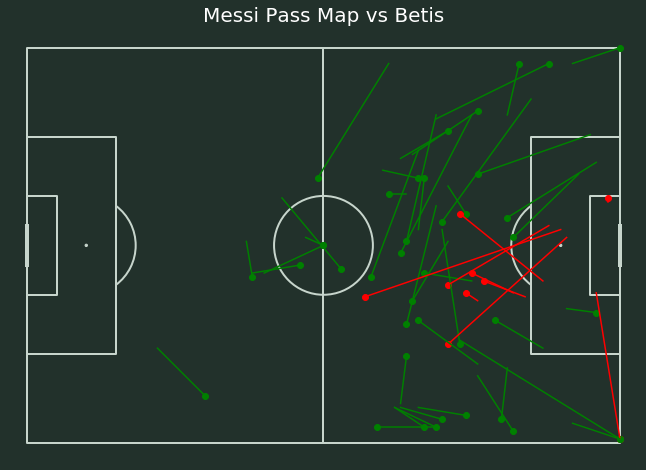

In [15]:
# the base figure, o fundo, basicamente

fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)

# o eixo y está invertido no picth statsbomb, tem o 0 em cima e o 80 em baixo
# inverter esse eixo
plt.gca().invert_yaxis()


# ciclo for para espetar os passes no campo
for x in range (len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='green')
        plt.scatter(df['x'][x],df['y'][x],color='green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='red')
        plt.scatter(df['x'][x],df['y'][x],color='red')

plt.title('Messi Pass Map vs Betis',color='white',size=20)